# 1. Setting Up Experiments & Loading Futures Data

We first load in the `pandas` and `matplotlib` libraries for this introduction.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

To get started with a trading research project we load in our raw data using the `load_data` function defined below. For setting up experiments we will use a dictionary, conviniently named `experiment`, which is initialized in `load_data`. `experiment` will be the input and output to all future functions.

In [2]:
def load_data(filename):
    """
    Loads raw data from a csv or txt file.
    Args:
        experiment(dict): empty dictionary to store the data in
        filename(str): filepath
    Returns:
        dict: Experiment dictionary with additional keys: filename, market_open, market_close, raw_data.
    """
    experiment = {}
    experiment['filename'] = filename

    # load in the data as a Pandas object
    df = pd.read_csv(filename, header=None, names=('date', 'time', 'open', 'high', 'low', 'close', 'volume'))

    # parse datetime
    times = pd.to_datetime(df.date + ' ' + df.time, format="%m/%d/%Y %H:%M")
    df.set_index(times, inplace=True)
    df = df.drop(['date', 'time'], axis=1)
    experiment['raw_data'] = df
    
    return experiment

As an example we load in CC, which are Cocoa Futures, and print the first 10 rows.

In [3]:
experiment = load_data(filename = 'data\\CC.txt')
df = experiment['raw_data']
df.head(10)

,open,high,low,close,volume
2009-09-28 04:00:00,3077,3080,3077,3079,55
2009-09-28 04:01:00,3073,3073,3073,3073,1
2009-09-28 04:03:00,3071,3071,3068,3068,8
2009-09-28 04:04:00,3067,3067,3063,3063,4
2009-09-28 04:05:00,3062,3062,3062,3062,1
2009-09-28 04:06:00,3063,3065,3063,3065,9
2009-09-28 04:07:00,3063,3065,3061,3061,8
2009-09-28 04:10:00,3061,3061,3060,3060,15
2009-09-28 04:12:00,3060,3060,3060,3060,1
2009-09-28 04:15:00,3058,3058,3058,3058,1


For further inspection we plot the closing price below.

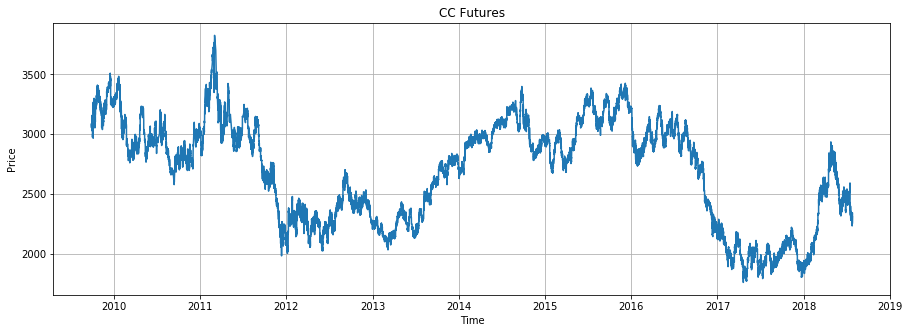

In [4]:
plt.figure(figsize=(15, 5))
plt.plot(df['close']);
plt.title('CC Futures');
plt.xlabel('Time');
plt.ylabel('Price');
plt.grid(True);